# Import Library

In [2]:
import numpy as np
import pandas as pd
import re
import string
import warnings
import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

warnings.filterwarnings('ignore')

# Data Loading

In [3]:
df = pd.read_csv('sephora_website_dataset.csv')

In [4]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [6]:
new_df = df.copy()

# Data Exploration

### Brand

In [7]:
df.brand.unique()

array(['Acqua Di Parma', 'AERIN', 'Aether Beauty', 'Algenist', 'Alpha-H',
       'alpyn beauty', 'ALTERNA Haircare', 'amika', 'AMOREPACIFIC',
       'Anastasia Beverly Hills', 'Anthony', 'Antonym', 'Aquis',
       'Armani Beauty', 'The Art of Shaving', 'Artis', 'Artist Couture',
       'Atelier Cologne', 'BALENCIAGA', 'bareMinerals', 'Beachwaver',
       'The Beauty Chef', 'BeautyBio', 'beautyblender', 'BECCA', 'belif',
       'Benefit Cosmetics', 'BERDOUES', 'Bésame Cosmetics',
       'Better Not Younger', 'Bio Ionic', 'Biossance', 'Bite Beauty',
       'bkr', 'Black Up', 'Blinc', 'Bobbi Brown', 'boscia', 'Briogeo',
       'Bumble and bumble', 'BURBERRY', 'Buxom', 'BVLGARI',
       'By Rosie Jane', 'Calvin Klein', 'Capri Blue', 'Carolina Herrera',
       'Caudalie', 'Cellu-cup', 'CHANEL', 'Charlotte Tilbury', 'Chloé',
       'Christian Louboutin', 'Christophe Robin', 'Ciaté London',
       'Cinema Secrets', 'Clarins', 'Clarisonic Skincare',
       'CLEAN RESERVE', 'CLINIQUE', 'Coal an

In [8]:
df.brand.nunique()

324

In [10]:
df.brand.value_counts()

SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
                     ... 
SHHHOWERCAP             1
Taste Beauty            1
bkr                     1
Cocofloss               1
DL.MD                   1
Name: brand, Length: 324, dtype: int64

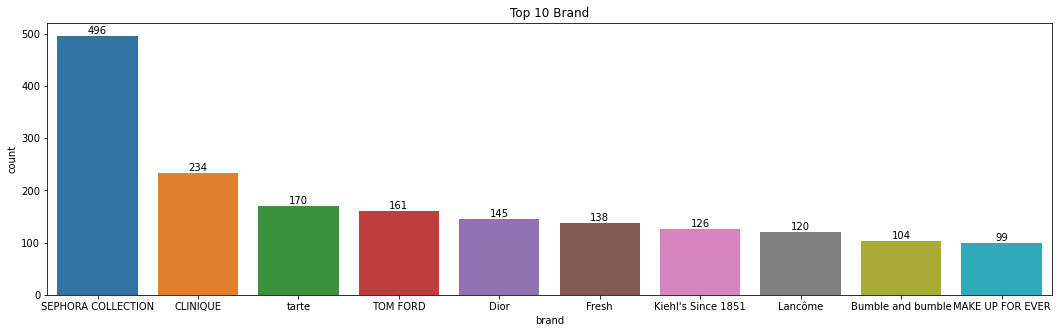

In [9]:
plt.figure(figsize=(18,5))

ax = sns.countplot(x='brand',data=df,order=pd.value_counts(df['brand']).iloc[:10].index)
ax.bar_label(ax.containers[0])
ax.set_title(f'Top 10 Brand')

plt.tight_layout;

### Category

In [12]:
df.category.nunique()

143

In [13]:
df.category.value_counts()

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Wellness                       1
High Tech Tools                1
Hair Styling & Treatments      1
Curls & Coils                  1
Lid Shadow Brush               1
Name: category, Length: 143, dtype: int64

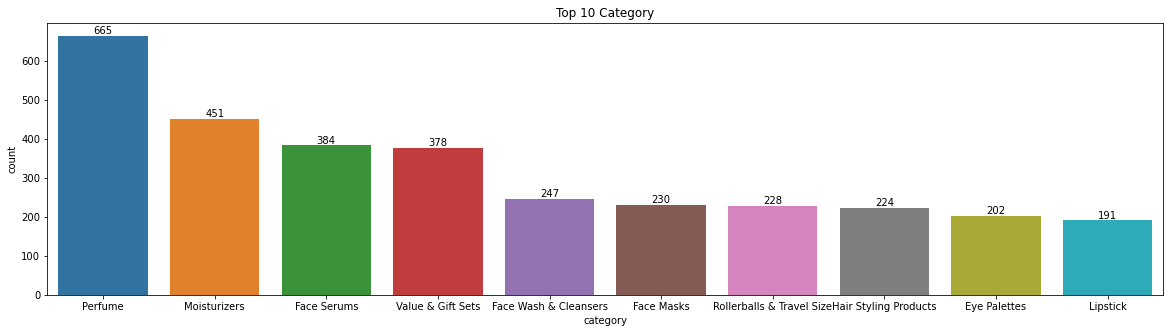

In [15]:
plt.figure(figsize=(20,5))

ax = sns.countplot(x='category',data=df,order=pd.value_counts(df['category']).iloc[:10].index)
ax.bar_label(ax.containers[0])
ax.set_title(f'Top 10 Category')

plt.tight_layout;

In [ ]:
df[df['category'] == 'no category']

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
39,2317907,AERIN,no category,Wild Geranium,0.27 oz/ 8 mL,0.0,0,108,30.0,30.0,...,True,online only,- 1.7 oz/ 50 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Fragrance (Parfum)- Water\Aqua...,1,0,0,0
2241,2249092,DOLCE&GABBANA,no category,K by Dolce & Gabbana,3.3 oz/ 100 mL,5.0,4,1300,94.0,94.0,...,False,0,- 1.6 oz/ 50 mL Eau de Toilette Spray - 3.3 o...,Fragrance Family: Earthy & WoodyScent Type: Ci...,Suggested Usage:-Cologne is intensified by the...,unknown,0,0,0,0
3132,2044915,Fresh,no category,Lotus Youth Preseve Rescue Mask Mini,no size,4.0,4,0,25.0,25.0,...,False,0,no options,What it is: A five-minute facial in a jar that...,Suggested Usage:-After cleansing- apply a gene...,Water- Glycerin- Propylene Glycol Dicaprylate/...,0,0,0,0
3885,2073674,IT Cosmetics,no category,Confidence in a Cleanser Mini,no size,0.0,0,0,12.5,12.5,...,True,online only,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-Gently massage onto wet skin ...,-Ceramides: Naturally occurring lipids that r...,1,0,0,0
3944,1350966,Jack Black,no category,Supreme Cream Triple Cushion™ Shave Lather Mini,no size,0.0,0,94,13.0,13.0,...,True,online only,no options,What it is:The ultimate rich lather shave crea...,Suggested Usage:-Activate lather with fingerti...,-Macadamia Nut Oil and Soybean Oil: Deeply so...,1,0,0,0
4122,2176014,Juliette Has a Gun,no category,Discovery Kit,1 X 4 mL and 7 x 1.7 mL,4.0,13,2000,25.0,25.0,...,False,0,no options,Discover the daring universe of Juliette has a...,Suggested Usage:-Spray directly on the skin. -...,Not A Perfume: Alcohol Denat.- Parfum (Fragran...,0,0,0,0
4405,2032159,Kiehl's Since 1851,no category,Creme de Corps Nourishing Dry Body Oil Mini,no size,4.5,2,0,18.0,18.0,...,False,0,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-Mist onto clean skin and gent...,-Grapeseed Oil: Rich in essential fatty acids...,0,0,0,0
4447,2032167,Kiehl's Since 1851,no category,Creme de Corps Smoothing Oil-To-Foam Body Clea...,no size,5.0,1,0,13.0,13.0,...,False,0,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-In the shower- apply to wet s...,-Grapeseed Oil: Rich in essential fatty acids...,0,0,0,0
7107,463,SEPHORA COLLECTION,no category,Heart Gift Card,no size,0.0,0,0,50.0,50.0,...,False,0,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0,0,0,0
7139,1765056,SEPHORA COLLECTION,no category,Eye Mask - Pomegranate - Energizing,1 Pair,3.5,26,0,5.0,5.0,...,True,exclusive,no options,To redeem your offer: \n1. SELECT FOUR MASKS: ...,no instructions,-Natural Pomegranate Extract: Tones and energ...,0,1,0,0


### Ratings

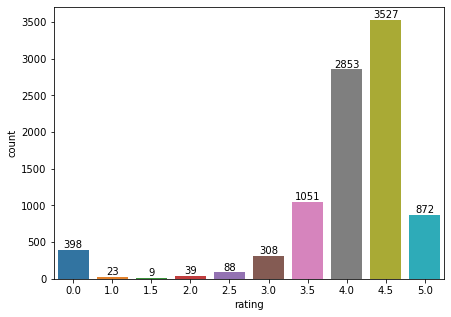

In [19]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='rating',data=df)
ax.bar_label(ax.containers[0])
ax.set_title(f'')

plt.tight_layout;

### Number Of Reviews

In [ ]:
ingred = df[['ingredients']].copy()

In [ ]:
ingred.tail(5)

,ingredients
9163,-Rose Quartz Extract: Hydrates dry skin. Aqua...
9164,Colorful Gloss Balm Wanderlust: Hydrogenated P...
9165,Aqua (Water)- Dimethicone- Isohexadecane- Poly...
9166,unknown
9167,unknown


In [ ]:
ingred.head(5)

,ingredients
0,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,unknown
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...
3,unknown
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...


In [ ]:
### Sample text

In [ ]:
sample_text = ingred['ingredients'].loc[9163]

print(sample_text)

-Rose Quartz Extract: Hydrates dry skin.  Aqua (Water)- Butylene Glycol- Lecithin- Glycerin- 1-2-Hexanediol- Hydroxyacetophenone- PEG-40 Hydrogenated Castor Oil- Sodium Polyacrylate- Phenoxyethanol- Parfum (Fragrance)- Xanthan Gum- Allium Chinense Bulb Extract- Sodium Hyaluronate- Glycosyl- Trehalose- Hydrogenated Starch Hydrolysate- Hydrolyzed Rice Bran Extract- Quartz.


In [ ]:
# Case Folding
sample_text = sample_text.lower()
sample_text = re.sub(r'\d+', '', sample_text)
sample_text = sample_text.translate(str.maketrans("","", string.punctuation))
sample_text = sample_text.strip()
print(sample_text)

rose quartz extract hydrates dry skin  aqua water butylene glycol lecithin glycerin hexanediol hydroxyacetophenone peg hydrogenated castor oil sodium polyacrylate phenoxyethanol parfum fragrance xanthan gum allium chinense bulb extract sodium hyaluronate glycosyl trehalose hydrogenated starch hydrolysate hydrolyzed rice bran extract quartz


In [ ]:
# Sentence Tokenization

nltk.download('punkt')
sent_token = sent_tokenize(sample_text)

print(sent_token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['rose quartz extract hydrates dry skin  aqua water butylene glycol lecithin glycerin hexanediol hydroxyacetophenone peg hydrogenated castor oil sodium polyacrylate phenoxyethanol parfum fragrance xanthan gum allium chinense bulb extract sodium hyaluronate glycosyl trehalose hydrogenated starch hydrolysate hydrolyzed rice bran extract quartz']


In [ ]:
# Word Tokenization

word_token = word_tokenize(sample_text)

print(word_token)

['rose', 'quartz', 'extract', 'hydrates', 'dry', 'skin', 'aqua', 'water', 'butylene', 'glycol', 'lecithin', 'glycerin', 'hexanediol', 'hydroxyacetophenone', 'peg', 'hydrogenated', 'castor', 'oil', 'sodium', 'polyacrylate', 'phenoxyethanol', 'parfum', 'fragrance', 'xanthan', 'gum', 'allium', 'chinense', 'bulb', 'extract', 'sodium', 'hyaluronate', 'glycosyl', 'trehalose', 'hydrogenated', 'starch', 'hydrolysate', 'hydrolyzed', 'rice', 'bran', 'extract', 'quartz']


In [ ]:
# Frequency Distribution

fdist = FreqDist(word_token)

In [ ]:
fdist.most_common(3)

[('extract', 3), ('quartz', 2), ('hydrogenated', 2)]

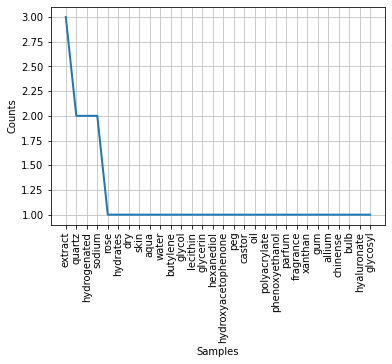

In [ ]:
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
#Stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
print(stop_words)

{'ourselves', 'only', 'weren', 'nor', 'herself', "you're", "hadn't", 'ain', 'until', 'it', 'of', 'so', 'shouldn', 'he', 'will', "hasn't", 'out', 'where', 'be', "shan't", 'haven', 'because', 'up', 'during', 'hers', 'who', 'you', 't', 'his', 'this', "haven't", "wouldn't", 'her', 'than', 'won', 'shan', 'all', 'against', 'more', 'are', 'own', 'its', 'below', 'too', 'we', 'can', 'other', 'your', 'ours', 'aren', 'some', 'very', "needn't", "don't", 'had', 'being', 'why', 'i', 'these', 'himself', 'hasn', 'same', 'between', 'such', 'once', 'me', 'our', "won't", "you'll", "aren't", 'by', 'him', 'what', 'yours', 'after', 'over', 'to', 'under', 'here', 'mustn', 'just', 'should', 're', 'my', 'she', 'a', "didn't", 'an', "doesn't", 'as', 'y', 'while', 'from', 'does', 'that', 'doesn', 'but', "you've", 'down', 'if', 'each', 'their', 'then', 'the', 'them', 'wasn', 'wouldn', 'itself', 'd', 'for', 'll', 'am', 'myself', 'is', 'most', "you'd", 'both', 'm', "that'll", 'ma', 'were', 'having', 'has', 'no', 'th

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sent_filtered = []

for w in word_token:
    if w not in stop_words:
        sent_filtered.append(w)
        
print("Tokenized Sentence:", word_token)
print("Filterd Sentence:", sent_filtered)

Tokenized Sentence: ['rose', 'quartz', 'extract', 'hydrates', 'dry', 'skin', 'aqua', 'water', 'butylene', 'glycol', 'lecithin', 'glycerin', 'hexanediol', 'hydroxyacetophenone', 'peg', 'hydrogenated', 'castor', 'oil', 'sodium', 'polyacrylate', 'phenoxyethanol', 'parfum', 'fragrance', 'xanthan', 'gum', 'allium', 'chinense', 'bulb', 'extract', 'sodium', 'hyaluronate', 'glycosyl', 'trehalose', 'hydrogenated', 'starch', 'hydrolysate', 'hydrolyzed', 'rice', 'bran', 'extract', 'quartz']
Filterd Sentence: ['rose', 'quartz', 'extract', 'hydrates', 'dry', 'skin', 'aqua', 'water', 'butylene', 'glycol', 'lecithin', 'glycerin', 'hexanediol', 'hydroxyacetophenone', 'peg', 'hydrogenated', 'castor', 'oil', 'sodium', 'polyacrylate', 'phenoxyethanol', 'parfum', 'fragrance', 'xanthan', 'gum', 'allium', 'chinense', 'bulb', 'extract', 'sodium', 'hyaluronate', 'glycosyl', 'trehalose', 'hydrogenated', 'starch', 'hydrolysate', 'hydrolyzed', 'rice', 'bran', 'extract', 'quartz']


### Ingredients Column Preprocessing

In [ ]:
# Stopwords
ingred['stopwords'] = ingred['ingredients'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
ingred[['ingredients','stopwords']].head()

,ingredients,stopwords
0,Arancia di Capri Eau de Toilette: Alcohol Dena...,14
1,unknown,0
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...,14
3,unknown,0
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,14


In [ ]:
# Punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

ingred['punctuation'] = ingred['ingredients'].apply(lambda x: count_punct(x))
ingred[['ingredients','punctuation']].head()

,ingredients,punctuation
0,Arancia di Capri Eau de Toilette: Alcohol Dena...,99
1,unknown,0
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...,18
3,unknown,0
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,109


In [ ]:
# Hastag
ingred['hastags'] = ingred['ingredients'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
ingred[['ingredients','hastags']].head()

,ingredients,hastags
0,Arancia di Capri Eau de Toilette: Alcohol Dena...,0
1,unknown,0
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...,0
3,unknown,0
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,0


In [ ]:
# Numbers / Digits
ingred['numerics'] = ingred['ingredients'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
ingred[['ingredients','numerics']].head()

,ingredients,numerics
0,Arancia di Capri Eau de Toilette: Alcohol Dena...,0
1,unknown,0
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...,0
3,unknown,0
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,2


In [ ]:
# Uppercase
ingred['upper'] = ingred['ingredients'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
ingred[['ingredients','upper']].head()

,ingredients,upper
0,Arancia di Capri Eau de Toilette: Alcohol Dena...,1
1,unknown,0
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...,0
3,unknown,0
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1


In [ ]:
ingred.head(10)

,ingredients,stopwords,punctuation,hastags,numerics,upper
0,Arancia di Capri Eau de Toilette: Alcohol Dena...,14,99,0,0,1
1,unknown,0,0,0,0,0
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...,14,18,0,0,0
3,unknown,0,0,0,0,0
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,14,109,0,2,1
5,unknown,0,0,0,0,0
6,unknown,0,0,0,0,0
7,Alcohol Denat.- Water- Fragrance- Limonene- Hy...,14,28,0,0,0
8,Alcohol Denat.- Water- Fragrance- Polyquaterni...,14,31,0,2,0
9,unknown,0,0,0,0,0


### Preprocessing Function

In [ ]:
# Membuat Sebuah Function Agar Dapat Diterapkan pada Kolom Ingredients

def text_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip() #Menghilangkan Whitespace
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub(r"\d+", " ", teks) #Menghilangkan Numerik
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stop_words]) #menghilangkan stopwords
  return teks

In [ ]:
# Membuat Sebuah Function Agar Dapat Diterapkan pada Kolom Brand, Category, Name

def text_proses_1(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip() #Menghilangkan Whitespace
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub(r"\d+", " ", teks) #Menghilangkan Numerik
  tokens = word_tokenize(teks)
  return teks

In [ ]:
new_df['brand'] = new_df['brand'].apply(lambda x: text_proses_1(x))
new_df['category'] = new_df['category'].apply(lambda x: text_proses_1(x))
new_df['name'] = new_df['name'].apply(lambda x: text_proses_1(x))

In [ ]:
# Mengaplikasikan Semua Teknik Preprocessing ke dalam Semua Documents pada kolom Ingredients

ingred['text_processed'] = ingred['ingredients'].apply(lambda x: text_proses(x))
ingred.head(10)

,ingredients,stopwords,punctuation,hastags,numerics,upper,text_processed
0,Arancia di Capri Eau de Toilette: Alcohol Dena...,14,99,0,0,1,arancia di capri eau de toilette alcohol denat...
1,unknown,0,0,0,0,0,unknown
2,Alcohol Denat.- Water- Fragrance- Limonene- Li...,14,18,0,0,0,alcohol denat water fragrance limonene linaloo...
3,unknown,0,0,0,0,0,unknown
4,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,14,109,0,2,1,colonia alcohol denat water fragrance limonene...
5,unknown,0,0,0,0,0,unknown
6,unknown,0,0,0,0,0,unknown
7,Alcohol Denat.- Water- Fragrance- Limonene- Hy...,14,28,0,0,0,alcohol denat water fragrance limonene hydroxy...
8,Alcohol Denat.- Water- Fragrance- Polyquaterni...,14,31,0,2,0,alcohol denat water fragrance polyquaternium e...
9,unknown,0,0,0,0,0,unknown


In [ ]:
count_vect = CountVectorizer()

count_vect.fit(ingred.text_processed)
ingred_vect = count_vect.transform(ingred.text_processed)

In [ ]:
ingred_vect

<9168x12019 sparse matrix of type '<class 'numpy.int64'>'
	with 665745 stored elements in Compressed Sparse Row format>

In [ ]:
print('Dense Matrix - CountVectorizer()')
pd.DataFrame(ingred_vect.toarray(), columns = count_vect.get_feature_names_out())

Dense Matrix - CountVectorizer()


,aa,abaca,abalone,abeille,abeitate,abelle,abelmoschus,abies,abietata,abietate,...,zizanioides,zizanoides,ziziphus,zizyphus,zome,zone,zones,zsa,zymbiozome,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dense_col = pd.DataFrame(ingred_vect.toarray(), columns = count_vect.get_feature_names_out())

In [ ]:
table_1 = pd.concat([new_df, dense_col], axis=1)
table_1.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,zizanioides,zizanoides,ziziphus,zizyphus,zome,zone,zones,zsa,zymbiozome,zzzz
0,2218774,acqua di parma,fragrance,blu mediterraneo miniature set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,0,0,0,0,0,0,0,0,0,0
1,2044816,acqua di parma,cologne,colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,0,0,0,0,0,0,0,0,0,0
2,1417567,acqua di parma,perfume,arancia di capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,0,0,0,0,0,0,0,0,0,0
3,1417617,acqua di parma,perfume,mirto di panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,0,0,0,0,0,0,0,0,0,0
4,2218766,acqua di parma,fragrance,colonia miniature set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,0,0,0,0,0,0,0,0,0,0
